In [1]:
import os
import pandas as pd
import torch
from torchvision.io import read_image
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import cv2

import random
import yaml
import json
import os
from bs4 import BeautifulSoup
import numpy as np
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q /content/drive/MyDrive/plates_recognition/datasets.zip

##Обучение модели детекции транспорта

In [ ]:
classes = {'bus':0, 'car':1,'non-motorized_vehicle':9, 'motorized_vehicle':2, 'articulated_truck':3, 'pickup_truck':4, 'single_unit_truck':5, 
                       'work_van':6, 'pedestrian':7, 'bicycle':8, 'motorcycle':10}

In [ ]:
def change_annotations(path):
    for label in os.listdir(path):
        with open(path+label, 'r') as f:
            text = f.readlines()
            for key, item in classes.items():        
                text = [i.replace(key, str(item)) for i in text]
            with open(path+label, 'w') as f1:
                [f1.write(str(i)) for i in text]
    print('OK')
    pass

In [4]:
change_annotations('/content/cars_detection/labels/train/')

OK


In [5]:
change_annotations('/content/cars_detection/labels/valid/')

OK


In [6]:
change_annotations('/content/cars_detection/labels/test/')

OK


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt  # install

In [ ]:
# создаем yaml файл
yaml_file = {'train':'../cars_detection/images/train' ,
            'val': '../cars_detection/images/valid',
            'nc' : '11',
            'names' : {0:'bus', 1:'car', 2:'motorized_vehicle', 3:'articulated_truck', 4:'pickup_truck', 5:'single_unit_truck', 
                       6:'work_van', 7:'pedestrian', 8:'bicycle', 9:'non-motorized_vehicle', 10:'motorcycle'}}

with open('vehicle_detection.yaml', 'w') as file:
    documents = yaml.dump(yaml_file, file)

In [ ]:
!python train.py --img 736 --batch 32 --epochs 10 --data vehicle_detection.yaml --cfg models/yolov5m.yaml 

train: weights=yolov5s.pt, cfg=models/yolov5m.yaml, data=vehicle_detection.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=32, imgsz=736, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-172-gc4c0ee8 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

<function matplotlib.pyplot.show(*args, **kw)>

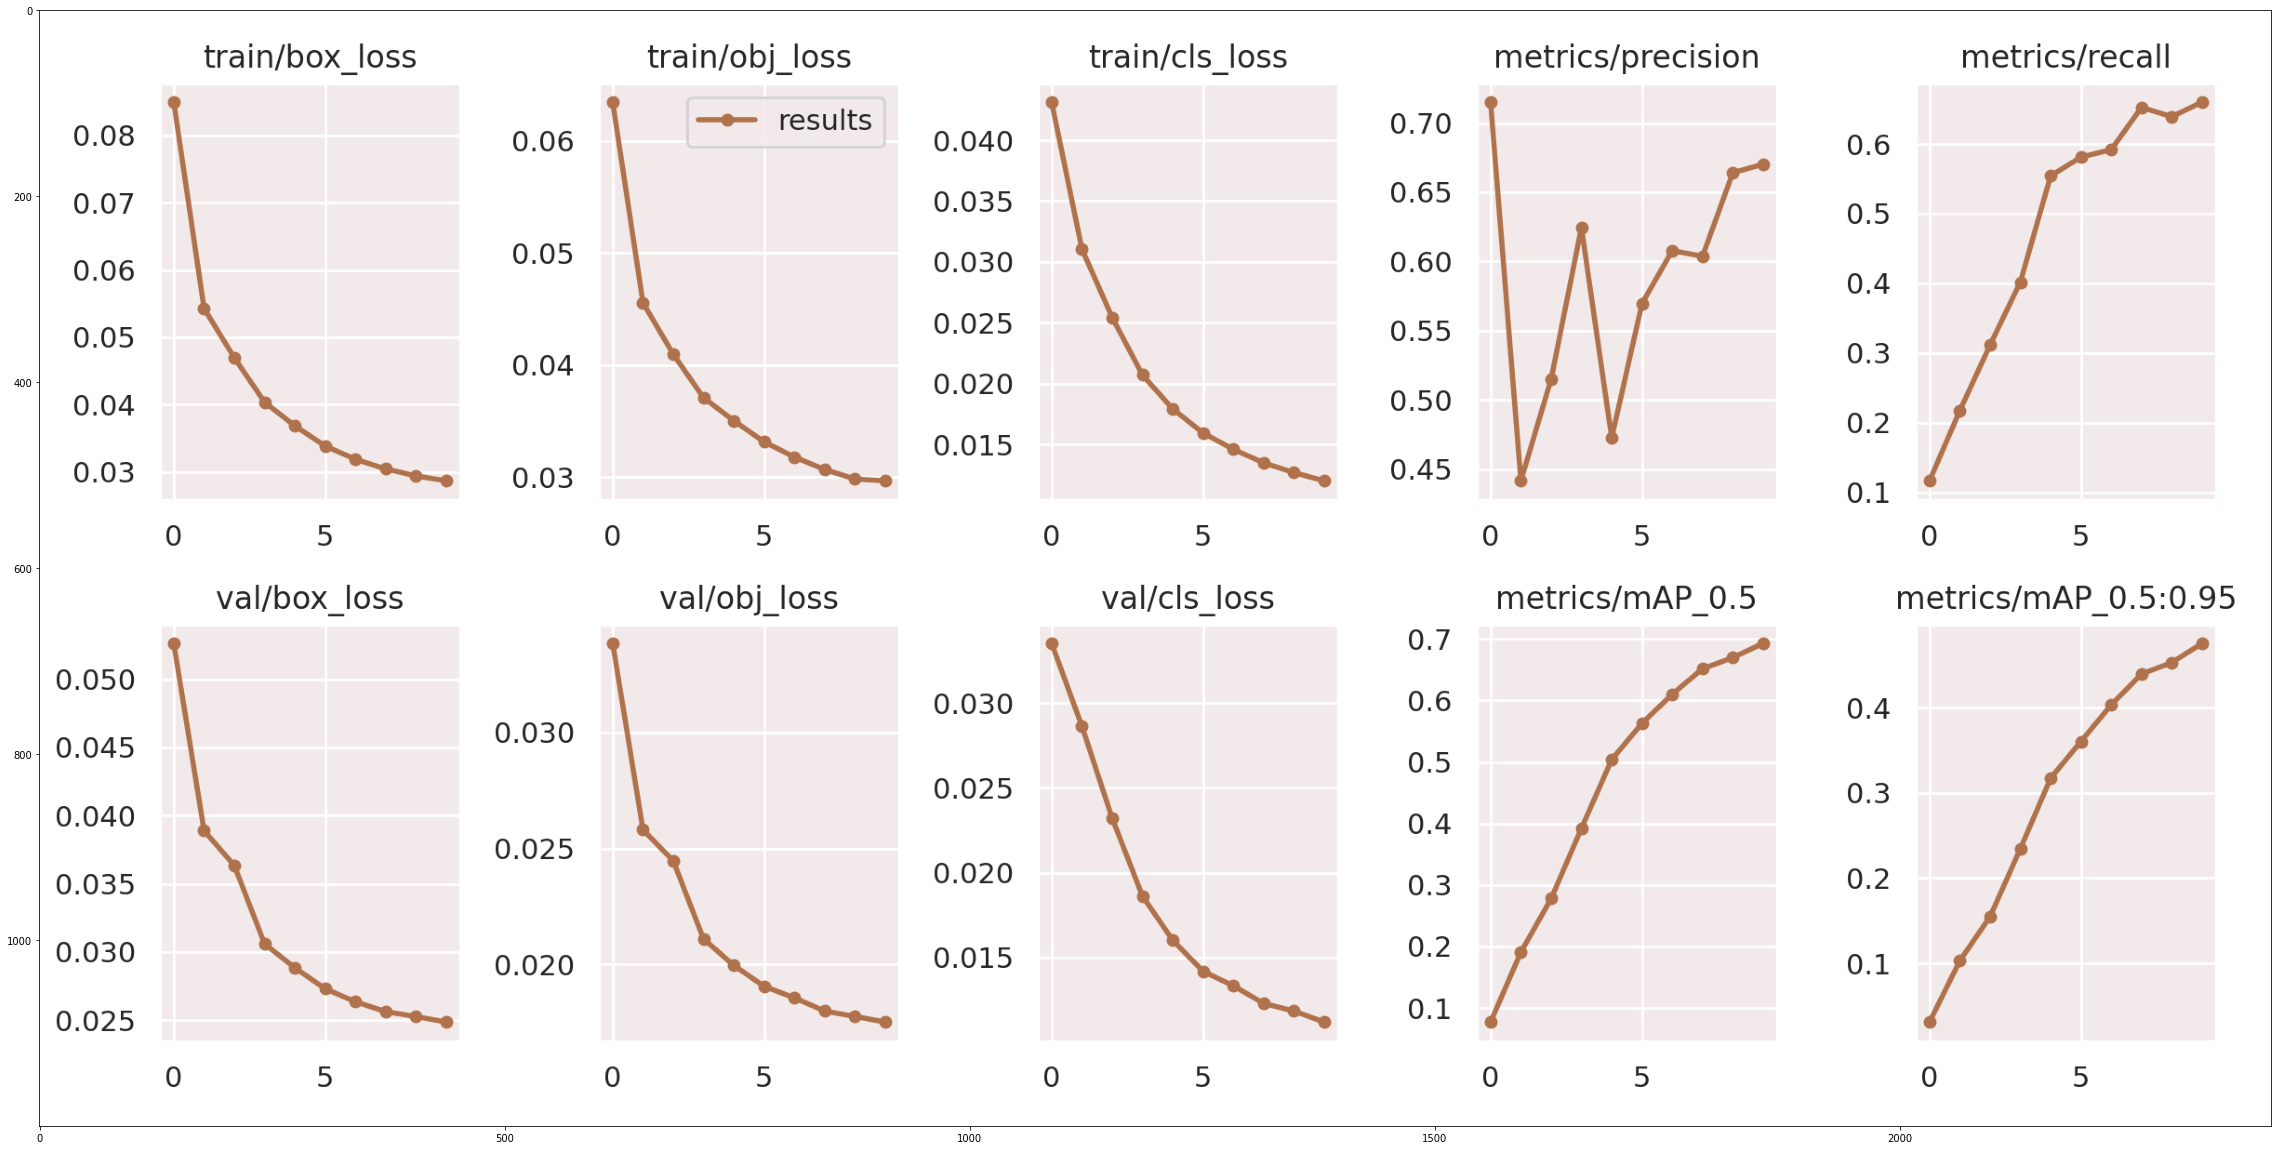

In [7]:
img = cv2.imread('/content/yolov5/runs/train/exp/results.png')
plt.figure(figsize=(40,40))
plt.imshow(img)    
plt.show

##Обучение модели детекции номера



In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt  # install

In [ ]:
# создаем yaml файл

yaml_file = {'train':'../plates_detection/images/train' ,
            'val': '../plates_detection/images/valid',
            'nc' : '1',
            'names' : ['plates']}

with open('plates_detection.yaml', 'w') as file:
    documents = yaml.dump(yaml_file, file)

In [ ]:
!python train.py --img 256 --batch 64 --epochs 50 --data plates_detection.yaml --cfg models/yolov5m.yaml 

train: weights=yolov5s.pt, cfg=models/yolov5m.yaml, data=plates_detection.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=64, imgsz=256, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-172-gc4c0ee8 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=

<function matplotlib.pyplot.show(*args, **kw)>

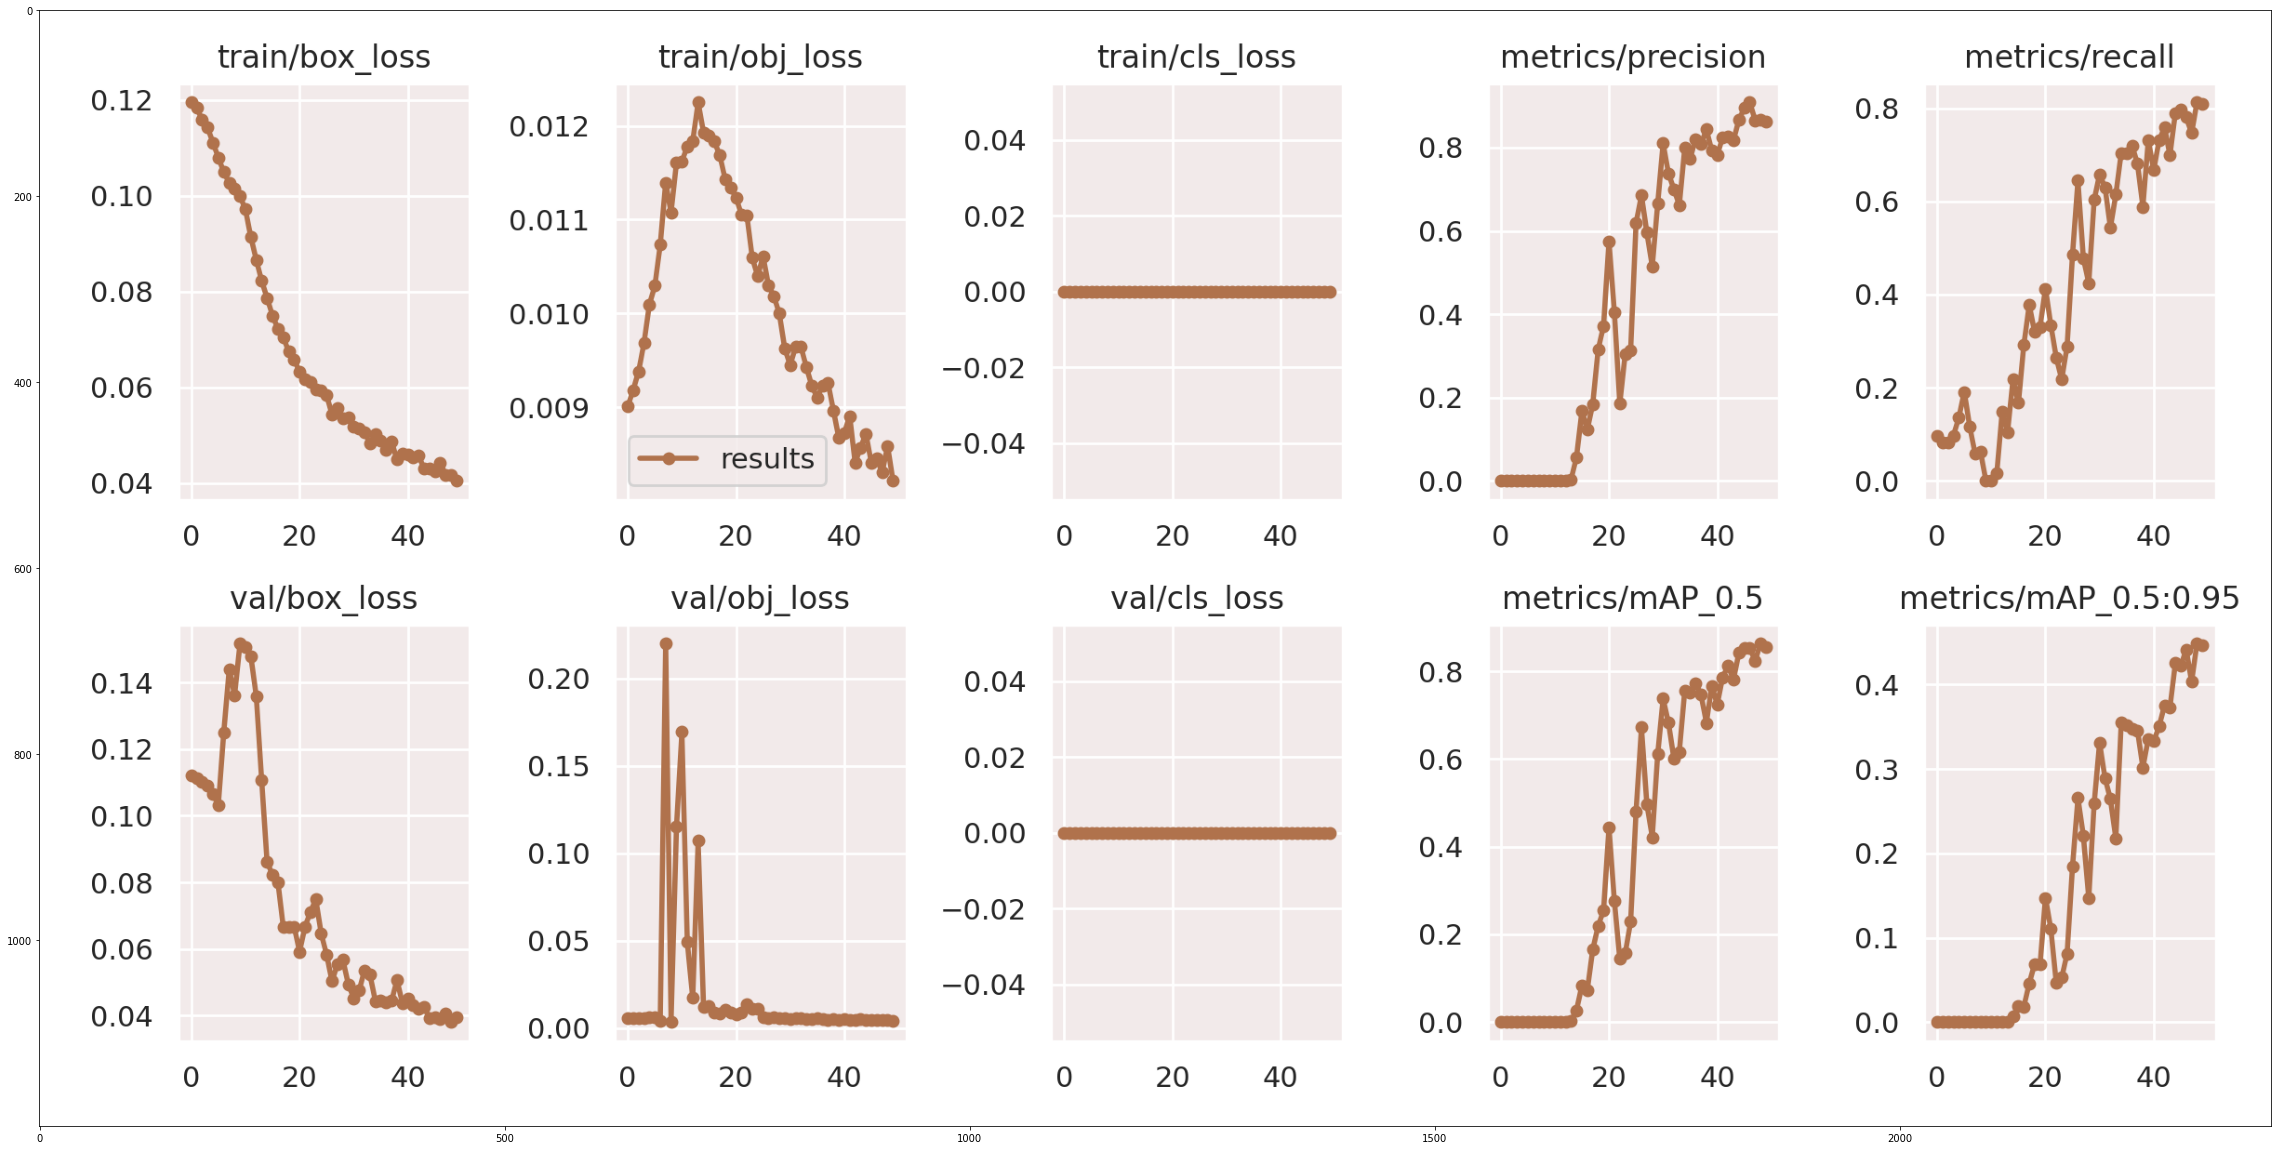

In [ ]:
img = cv2.imread('/content/yolov5/runs/train/exp/results.png')
plt.figure(figsize=(40,40))
plt.imshow(img)    
plt.show

In [ ]:
!python detect.py --img 256 --source /content/plates_detection/images/test/  --weights runs/train/exp/weights/best.pt --conf 0.25

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/plates_detection/images/test/, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-172-gc4c0ee8 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/112 /content/plates_detection/images/test/13.jpg: 224x256 1 plates, 14.0ms
image 2/112 /content/plates_detection/images/test/14.jpg: 160x256 4 platess, 13.2ms
image 3/112 /content/plates_detection/images/test/16.jpg: 224x256 2 platess, 11.9ms
image 4/112 /content/plates_detection/images/test/171.jpg: 192x256 3 plat

##Загрузка обученной модели

In [ ]:
cars_detection = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt') 
cars_detection.eval()
img = cv2.imread('/content/00000022.jpg')
results = cars_detection(img)
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,277.209686,145.906418,510.027557,374.278564,0.938834,1,car
